Funny But Topical Group Name
<br>Cole Rutledge, Trevor Heydt, Jonathan Stokes
<br>MTH306 Intro to Data Science
<br>Final Project Code


##Setup

This code imports all necessary libraries, as well as forms our data into a directory with keys based on the tickers of each stock.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import matplotlib.image as img
import yfinance as yf
from datetime import datetime
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
#Required for google CoLab, not necessary for Jupiter Notebook
#!unzip SPData.zip

The following code may take awhile to run, it has to read every csv file in the associated folder.

In [3]:
##### This code segment assigns all of the dataframes for each stock to a dictionary
path = 'SPData\\SPData'
csv_files = glob.glob(os.path.join(path, "*.csv"))

d = {}
d2 = {}

for f in csv_files:
    d["{0}".format(f)] = pd.read_csv(f)

for key in d.keys():
  d2[key[14:key.index(".")]] = d[key]

print(d2['AAPL']) #Tests that data was properly put into dictionary d2


             Date        Open        High         Low       Close   Adj Close  \
0      1980-12-12    0.128348    0.128906    0.128348    0.128348    0.099874   
1      1980-12-15    0.122210    0.122210    0.121652    0.121652    0.094663   
2      1980-12-16    0.113281    0.113281    0.112723    0.112723    0.087715   
3      1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089886   
4      1980-12-18    0.118862    0.119420    0.118862    0.118862    0.092492   
...           ...         ...         ...         ...         ...         ...   
10586  2022-12-07  142.190002  143.369995  140.000000  140.940002  140.940002   
10587  2022-12-08  142.360001  143.520004  141.100006  142.649994  142.649994   
10588  2022-12-09  142.339996  145.570007  140.899994  142.160004  142.160004   
10589  2022-12-12  142.699997  144.500000  141.059998  144.490005  144.490005   
10590  2022-12-13  149.500000  149.970001  144.240005  145.470001  145.470001   

            Volume  
0     

Here are a few additional links we used to determine stock rankings and sectors for the S&P 500. Some of the ranking data may not match our data due to the speed at which the S&P 500 changes and updates, but sectors will match

*   https://stockanalysis.com/list/sp-500-stocks/

*   https://www.visualcapitalist.com/complete-breakdown-of-sp-500-companies/

*   https://www.tradingview.com/screener/?aff_id=4191






##Introduction

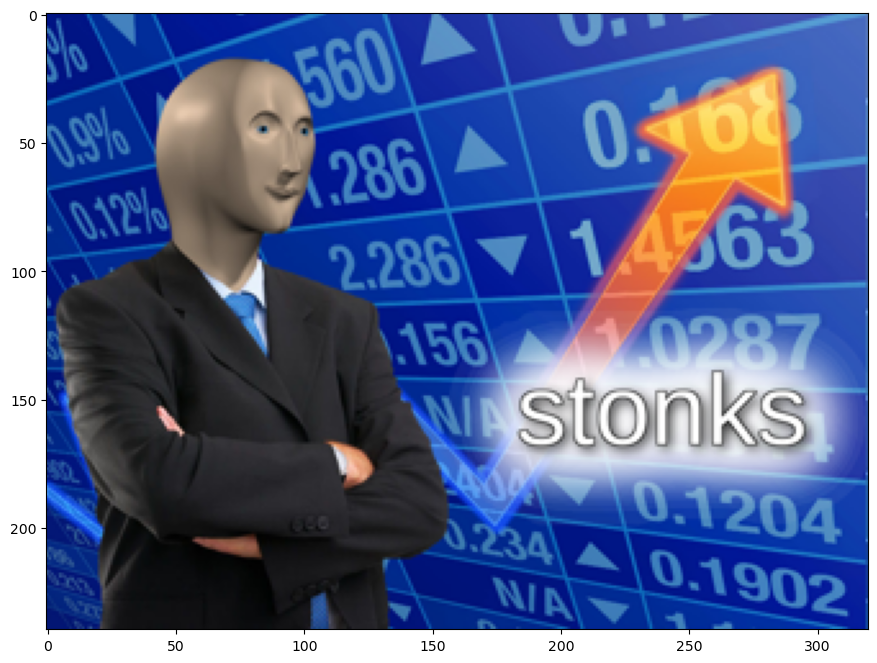

In [4]:
im = img.imread('stonks.png')
plt.imshow(im)

###Our Project
The goal of our project is to take data from the stock market and see what information we can find. We believe that going into the project without bias or presumption is of the utmost importance, for our views to be shaped by the data, not shape the data to our views. However, we will not forget what we already know of the stock market, taking our experience into consideration when interpreting the results of our data.
<br><br>

###The S&P 500
The data for our project comes from the S&P 500, also known as the Standard and Poor's 500. Henry Varnum Poor created Poor's Publishing in 1860, while the Standard Statistics Bureau was founded in 1906. By 1923, the SSB was renamed to the Standard Statistics Company, and they created their first market index, an index of 233 companies updated weekly. In 1926, they create a daily updating index of just 90 companies. Standard Statistics Company and Poor's Publishing merge into Standard & Poor's in 1941, keeping up with the daily index, and the S&P 500 is officially created in 1957. The index now contains 500 companies across various sectors and by the 1980s is updated every 15 seconds, even more frequently in the modern digital age (although the stock weights in the index are only rebalanced once a financial quarter).
<br><br>

###Our Data
Though the S&P 500 goes back to 1957, our data only goes back as far as January 2nd, 1962, the year that Ultronic Systems takes over the compiling of the index. Our data also ends on December 13th, 2022, simply due to the limited range of our source. In the first phase of the project, however, we use data from Yahoo Finance, which contains data up to the current day.
<br>
For each weekday of our data, if a stock has data on that day, we see the open price, close price, adjusted close price, high price, low price, and volume of stocks traded for that day. Finally, each stock is classified into one of eleven sectors.

##Phase 1: General Trends

This first graph just shows the S&P 500 over time measured according to its adjusted closing price daily.

[*********************100%%**********************]  1 of 1 completed


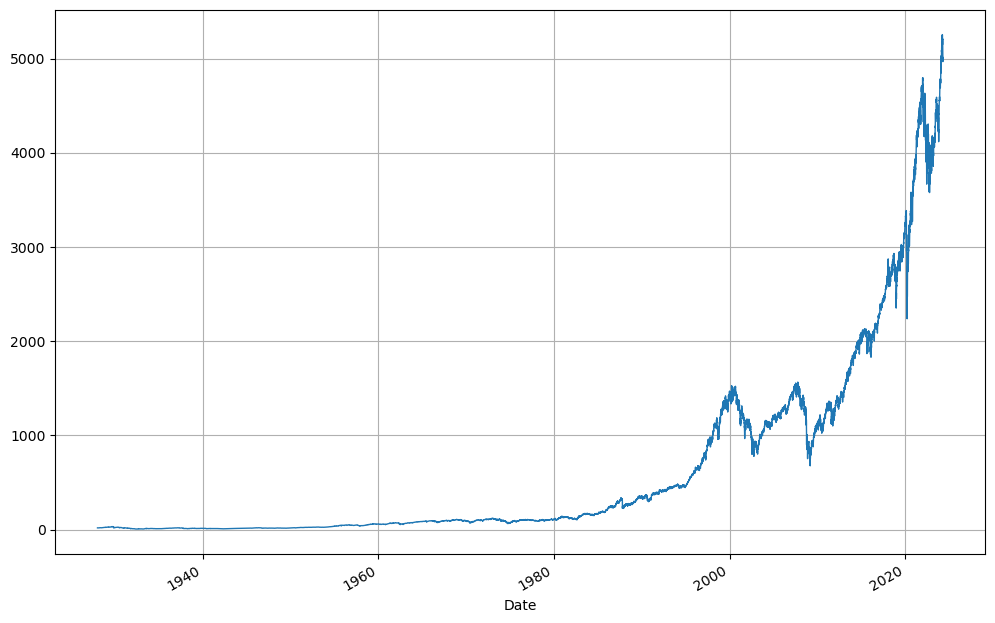

In [5]:
spx = yf.download("^GSPC")
spx["Adj Close"].plot(grid = True,lw=1);

These plots show the S&P 500, Microsoft, Apple, and Google according to their Adjusted close values daily since each went public. This provides a visual using well known companies.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


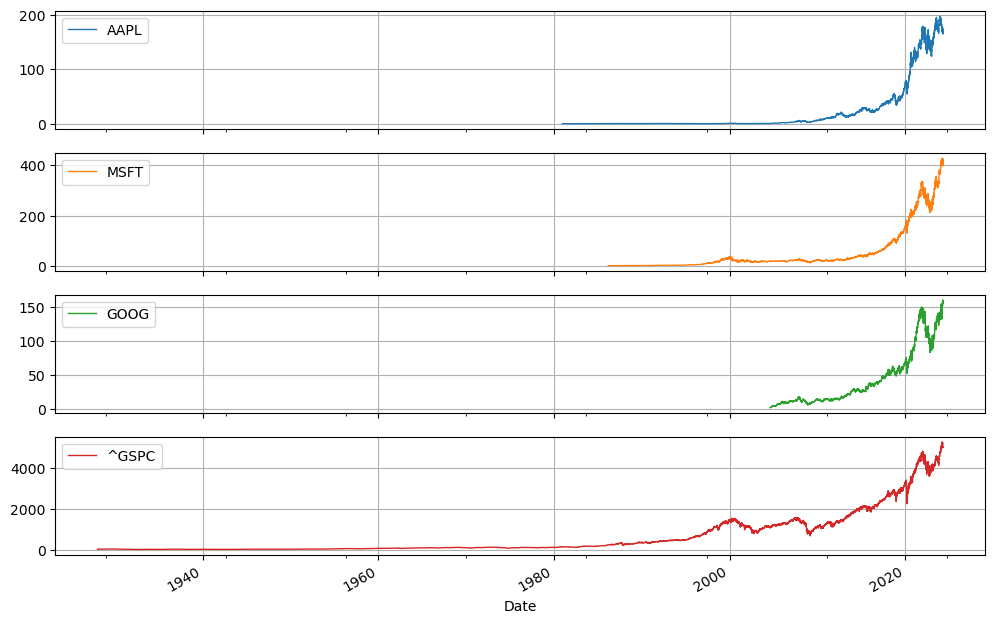

In [6]:
msft = yf.download("MSFT")
#hist = msft.history(period="max")

aapl = yf.download("AAPL")
#hist_aapl = aapl.history(period="max")

goog = yf.download("GOOG")
#hist_goog = goog.history(period="max")

spx = yf.download("^GSPC")


adj_close = pd.DataFrame({ "AAPL": aapl["Adj Close"],
                           "MSFT": msft["Adj Close"],
                           "GOOG": goog["Adj Close"],
                           "^GSPC": spx["Adj Close"]})

adj_close.plot(subplots=True,grid = True,linewidth=1);

So we've looked at overall market data and some well known companies but why does the market move in the way that it does? What general trends (if any) does the market subscribe to? Let's talk about recessions first. The following plot shows the S&P 500 during the dotcom bubble. The dotcom bubble was a crash that occured in the early 2000s, as dotcom companies became increasingly overvalued; then a market depression in the tech industry in Japan turned into a worldwide market crash over the course of about two years. This was a recession that was pretty much entirely the fault of companies taking advantage of the market.

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

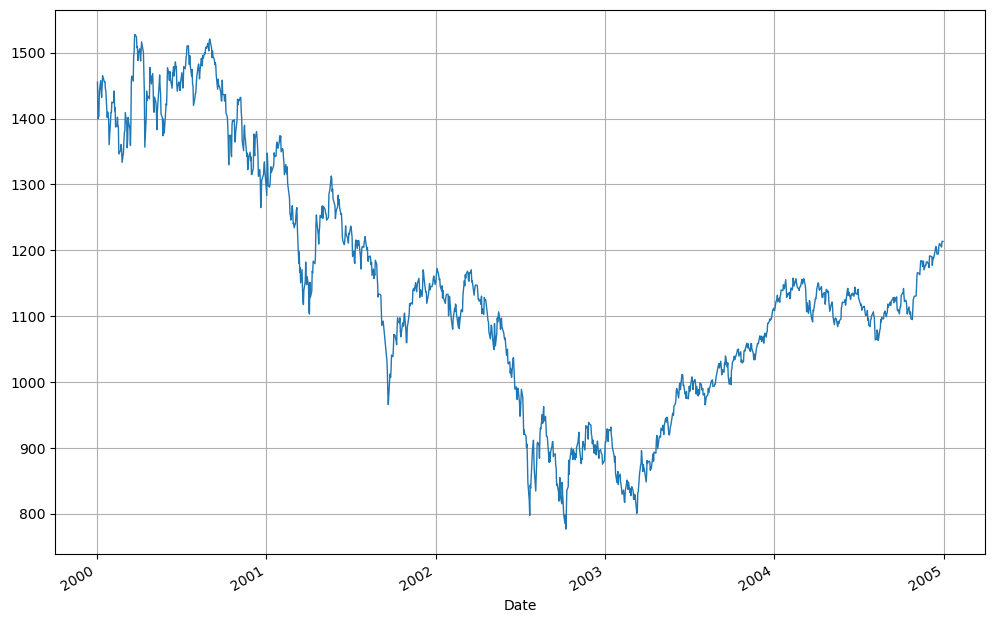

In [7]:
#dotcom bubble
dotcom_start = datetime(2000,1,1)
dotcom_end = datetime(2004,12,31)

spx_dotcom = yf.download("^GSPC", dotcom_start, dotcom_end)

spx_dotcom["Adj Close"].plot(grid = True,lw=1)

The next plot shows the S&P 500 during the 2008 housing market crash. Banks became increasingly willing to give out large mortgage loans to home owners without making adequately sure the loans could be paid. When it came time for the loans to be paid back, the majority of them went unpaid which led the market into a massive crash and a multiyear long recession. This recession was the fault of the banks, giving out loan after loan without the proper oversight. Thus far it seems that recessions are relatively predictable, poor business = poor market.

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

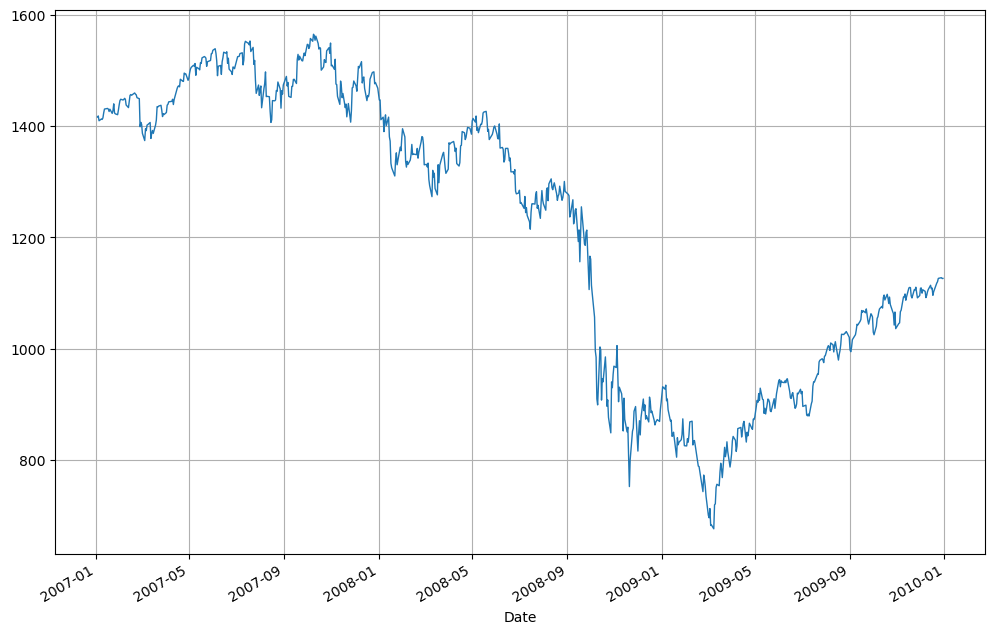

In [8]:
#2008 Great Recession
grec_start = datetime(2007,1,1)
grec_end = datetime(2009,12,31)

spx_grec = yf.download("^GSPC", grec_start, grec_end)

spx_grec["Adj Close"].plot(grid = True,lw=1)

This plot shows a far less predictable crash in the market. In 2021 a ship called the Ever Given got stuck in the Suez Canal and caused a relatively large downturn in the market for about six days. Its noteworthy that this graph is a significantly smaller time span than the previous ones and over the course of the year this market downturn was largely inconsequential. But this perfectly shows that market performance is remarkably difficult to pin down, there's such a large numbner of factors associated with it (some of which come out of nowhere) that market trends according to specific events are almost impossible to find.

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

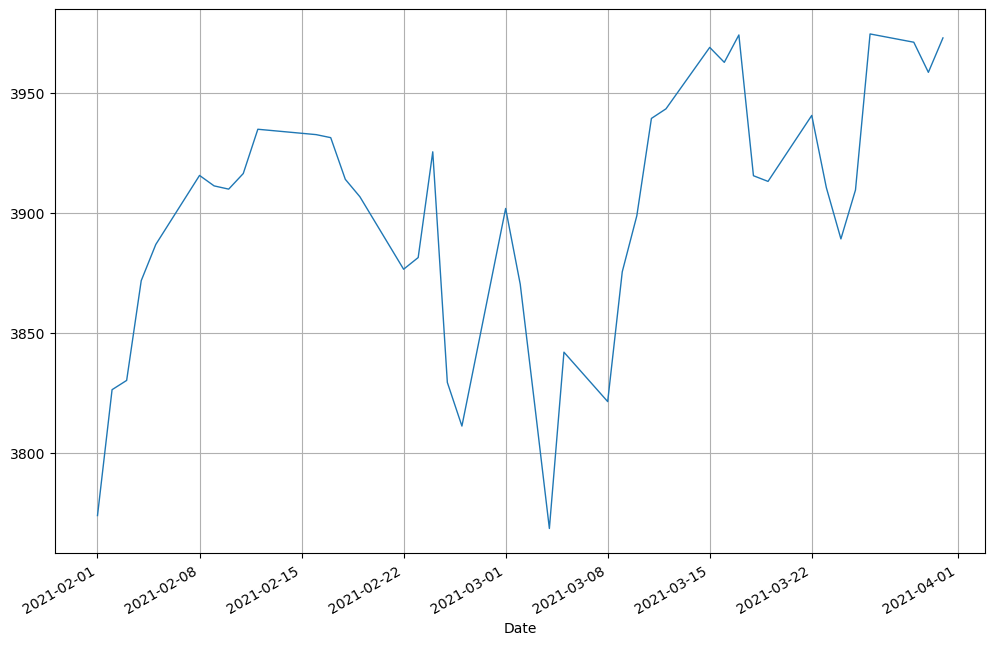

In [9]:
#Suez Canal
suez_start = datetime(2021,2,1)
suez_end = datetime(2021,4,1)

spx_suez = yf.download("^GSPC", suez_start, suez_end)

spx_suez["Adj Close"].plot(grid = True,lw=1)

So what about a trend that is less related with a specific event and is more interval based. September is anecdotally known as the worst market month, there isn't really objective evidence to prove this. But, it's believed that because of the time of year combined with many finance sector employees coming off of vacations that September usually is a negative month. The following plots show the S&P 500 in September for the last three years. at first glance they do in fact look negative.

In [10]:
#September
sep_start21 = datetime(2021,9,1)
sep_end21 = datetime(2021,9,30)

sep_start22 = datetime(2022,9,1)
sep_end22 = datetime(2022,9,30)

sep_start23 = datetime(2023,9,1)
sep_end23 = datetime(2023,9,30)


nyse_sep21 = yf.download("^NYA", sep_start21, sep_end21)
nyse_sep22 = yf.download("^NYA", sep_start22, sep_end22)
nyse_sep23 = yf.download("^NYA", sep_start23, sep_end23)


sep_total21 = pd.DataFrame({"Sep21": nyse_sep21["Adj Close"]})

sep_total22 = pd.DataFrame({"Sep22": nyse_sep22["Adj Close"]})

sep_total23 = pd.DataFrame({"Sep23": nyse_sep23["Adj Close"]})


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


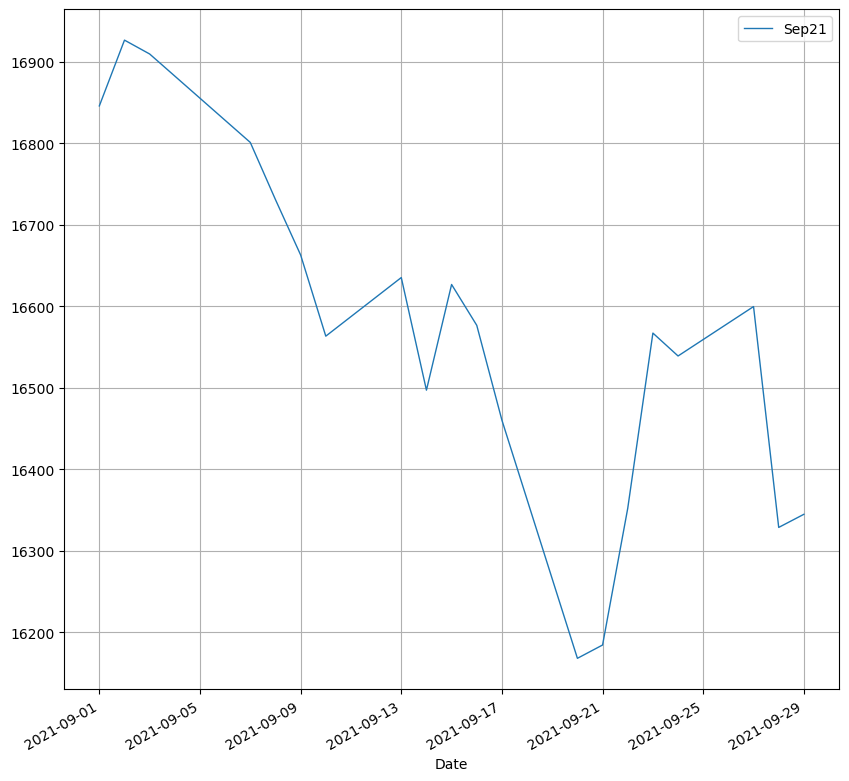

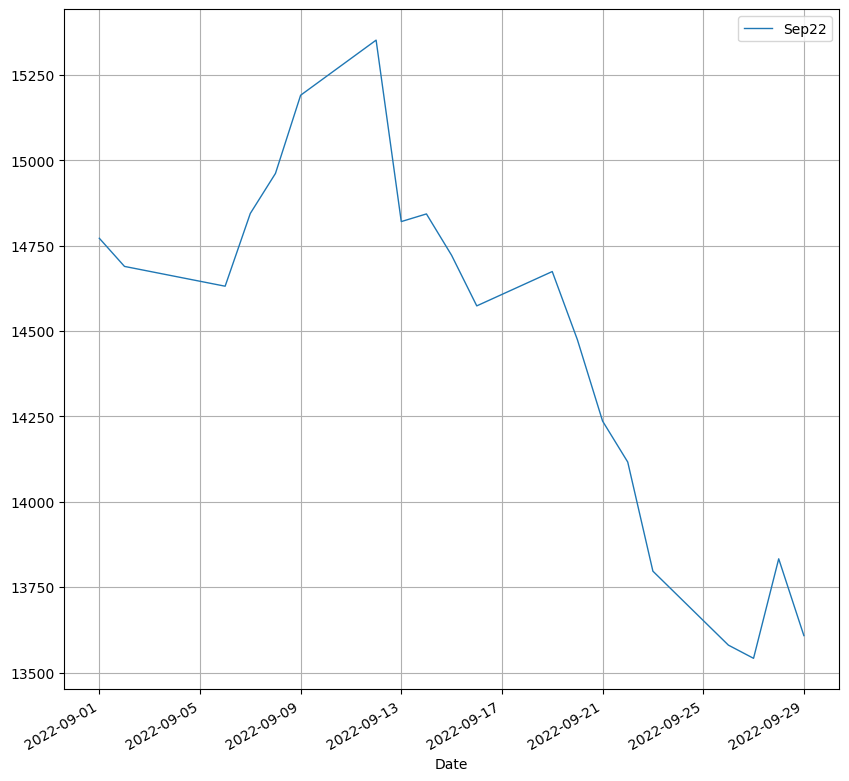

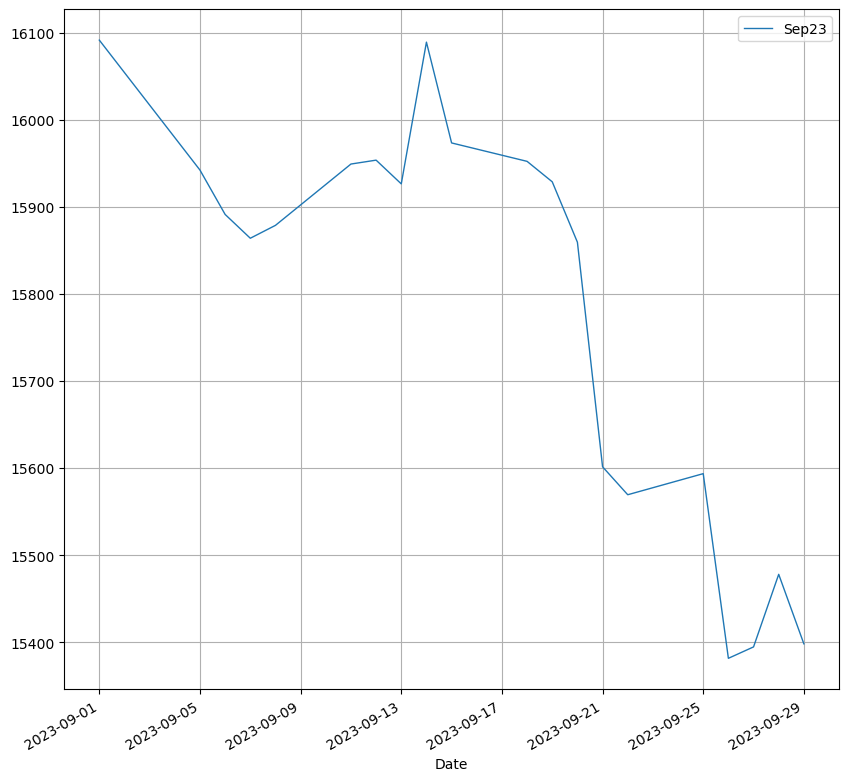

In [11]:
sep_total21.plot(subplots=False, grid = True,linewidth=1, figsize=(10,10));
sep_total22.plot(subplots=False, grid = True,linewidth=1, figsize=(10,10));
sep_total23.plot(subplots=False, grid = True,linewidth=1, figsize=(10,10));

In [12]:
yr_start = datetime(2014,1,1)
yr_end = datetime(2024,4,17)

nyse_2014 = yf.download("^NYA", yr_start, yr_end)

[*********************100%%**********************]  1 of 1 completed


In [13]:
resultDf = nyse_2014.groupby([nyse_2014.index.year, nyse_2014.index.month]).agg(["first", "last"])
new_df = resultDf.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)

new_df["Percent Change"] = (new_df[("Adj Close", "last")] - new_df[("Adj Close", "first")])/new_df[("Adj Close", "first")]

In [14]:
resultDf = nyse_2014.groupby([nyse_2014.index.year, nyse_2014.index.month]).agg(["first", "last"])
new_df_log = resultDf.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)

new_df_log["Percent Change"] = (np.log(new_df_log[("Adj Close", "last")])) - (np.log(new_df_log[("Adj Close", "first")]))
new_df_log

Adj Close               Percent Change
                  first          last               
Date Date                                           
2014 1     10283.419922   9967.650391      -0.031188
     2      9741.580078  10425.860352       0.067886
     3     10329.790039  10527.769531       0.018985
     4     10584.309570  10627.169922       0.004041
     5     10629.339844  10756.309570       0.011874
...                 ...           ...            ...
2023 12    16263.750000  16852.890625       0.035583
2024 1     16841.619141  16911.130859       0.004119
     2     17115.580078  17607.429688       0.028332
     3     17728.269531  18312.669922       0.032433
     4     18216.189453  17413.980469      -0.045037

[124 rows x 3 columns]

In [15]:
yrs_10 = pd.DataFrame(index = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'],
                      columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

yrs_10_alt = pd.DataFrame(index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                      columns = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'])

length = len(yrs_10)

year = 2014
months = 0

i =0
for yr in range(length):

    for mon in range(length+1):
        if (year == 2024 and mon >= 4):
            break
        yrs_10.iloc[[yr],[mon]] = new_df.loc[(year,mon+1), 'Percent Change']
    year = year + 1


In [16]:
yrs_10_alt = pd.DataFrame(index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                      columns = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'])
yr = 0
year = 2014

for yr in range(length):

    for mon in range(length+1):
        if (year == 2024 and mon >= 4):
                break
        yrs_10_alt.iloc[[mon],[yr]] = new_df.loc[(year,mon+1), 'Percent Change']
    year = year+1

In [17]:
yrs_10_alt_log = pd.DataFrame(index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                      columns = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'])
yr = 0
year = 2014

for yr in range(length):

    for mon in range(length+1):
        if (year == 2024 and mon >= 4):
                break
        yrs_10_alt_log.iloc[[mon],[yr]] = new_df_log.loc[(year,mon+1), 'Percent Change']
    year = year+1
yrs_10_alt_log

2014      2015      2016      2017      2018      2019      2020  \
Jan -0.031188 -0.027491 -0.037577  0.006132  0.035423  0.077353 -0.028129   
Feb  0.067886  0.036242 -0.005962  0.026864 -0.056049  0.025237 -0.099622   
Mar  0.018985 -0.018511  0.043691 -0.014544  -0.00534 -0.000298 -0.219304   
Apr  0.004041  0.014414  0.021007  0.006276  0.024152  0.017348  0.144236   
May  0.011874 -0.007574 -0.005285   0.00532  0.002727 -0.054089  0.065144   
Jun  0.019072 -0.023459  0.003326  0.005278  -0.00928  0.055772 -0.000543   
Jul -0.029413  0.002142  0.025328  0.011087  0.037546 -0.004664   0.04626   
Aug  0.032583 -0.063278  0.003215 -0.010415  0.008835 -0.014338  0.039782   
Sep -0.030837 -0.007622  -0.00467   0.02413  0.008649  0.026598  -0.03191   
Oct  0.025538  0.063132 -0.019732  0.006206 -0.072449  0.025876 -0.023654   
Nov  0.013485 -0.016226  0.039945  0.021202  0.008145  0.018249    0.1009   
Dec  -0.00454 -0.036414  0.020828  0.015284 -0.100548  0.033976   0.02638   

         2021      2022      2023      2024  
Jan  0.001425 -0.033429  0.056566  0.004119  
Feb  0.027988  -0.03113 -0.043891  0.028332  
Mar  0.017716  0.036763 -0.003985  0.032433  
Apr  0.029255 -0.072401  0.003746 -0.045037  
May  0.014016  0.013855 -0.042655       NaN  
Jun   -0.0053 -0.080977  0.054682       NaN  
Jul -0.002327  0.046126  0.031462       NaN  
Aug  0.013794 -0.032227 -0.022014       NaN  
Sep -0.042507   -0.0921 -0.044058       NaN  
Oct  0.041558  0.062344 -0.020619       NaN  
Nov -0.048566  0.064745  0.069906       NaN  
Dec    0.0619 -0.037284  0.035583       NaN

In [18]:
yrs_10_alt_log.index.name = 'month'

If september over the last few years looked negative, it could be interesting to see what every other month looks like. There could potentially be month to month conventions that could influence when we should buy or sell in the market. This shows every month's log change over 10 years, and while it's kind of fun to look at it doesn't provide much usuable informtion.

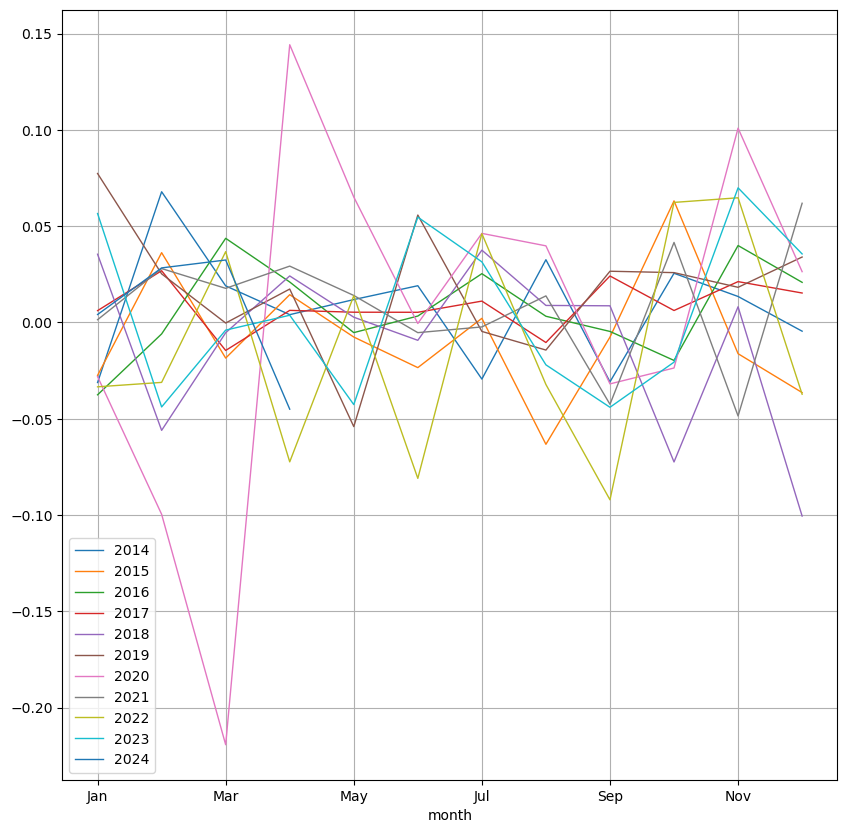

In [19]:
yrs_10_alt_log.plot(subplots=False, grid = True,linewidth=1, figsize=(10,10));

If we break those years part each into their own plot it becomes a bit easier to digest but still lacks in any good takeaway information.

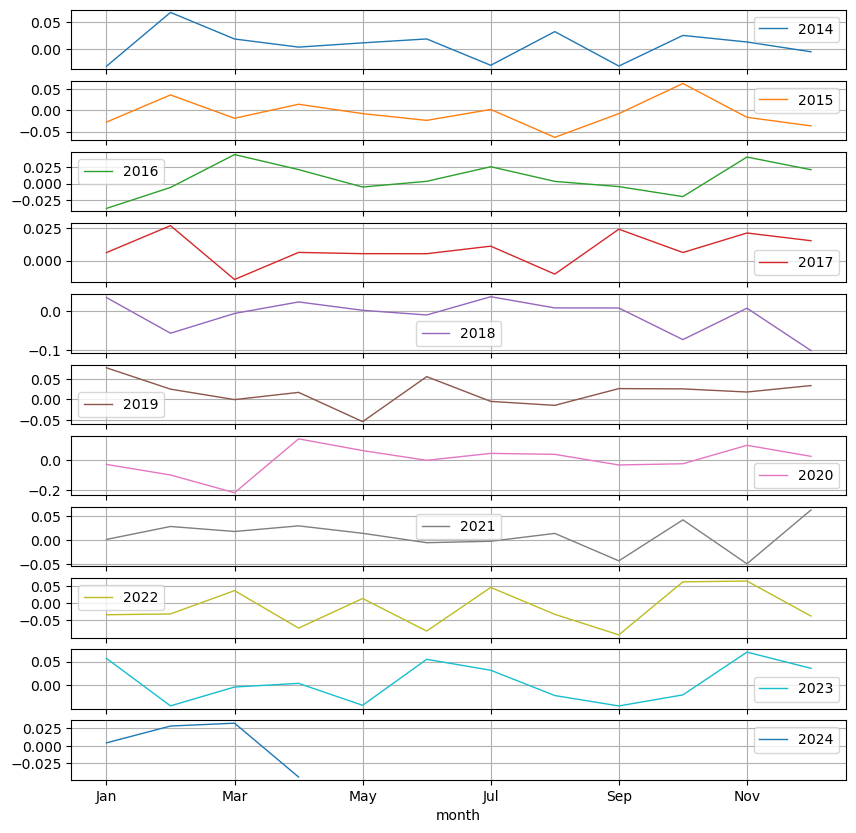

In [20]:
yrs_10_alt_log.plot(subplots=True, grid = True,linewidth=1, figsize=(10,10));

On a scatter plot like this we can actually start to glean some information from these data. The denser areas of the plot are becoming more visible but we can do better.

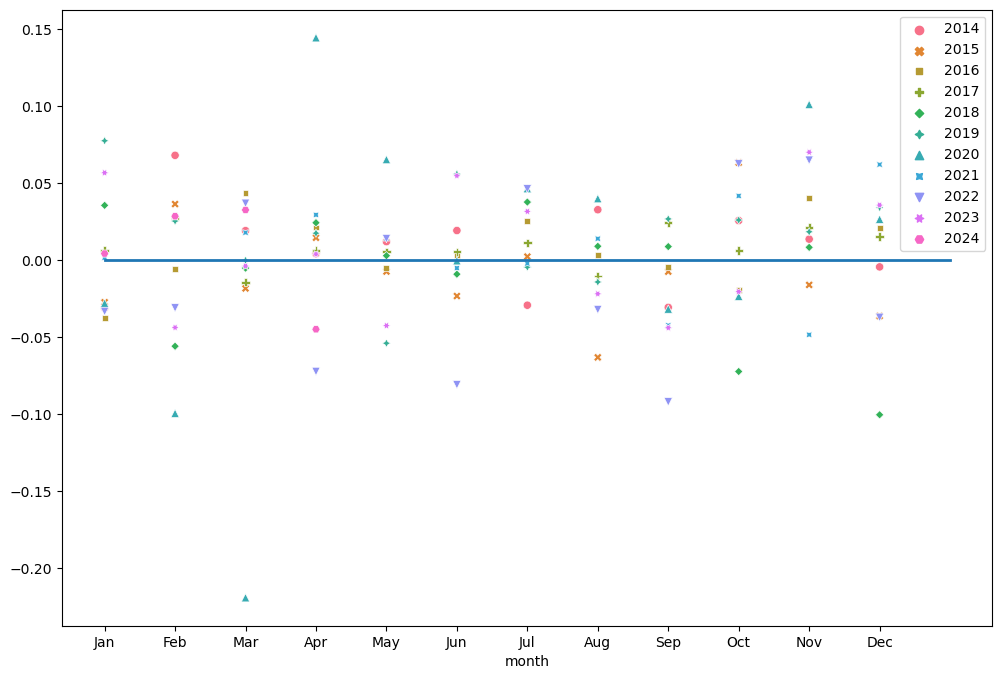

In [21]:
sns.scatterplot(data=yrs_10_alt_log)
plt.plot([0,12],[0,0], linewidth=2)

If we switch to box plots it becomes clear that there are in fact some month by month trends (as far as the last 10 years is concerned at least). The most consistently positive month is April, if we wanted to sell then the end of April would probably be a safe bet. We also see that September is actually the worst month or the month with the most negative change. Which one could take to mean that September could be a good buying month as you'll likely be buying while the market is on the way down. SO what does this actually mean? While I wouldn't bet my entire portfolio on this month to month "trend" we've found; it's evident that the market has for the last ten years at least followed a trackable path that one could use with lots of other information to make an informed financial decision.

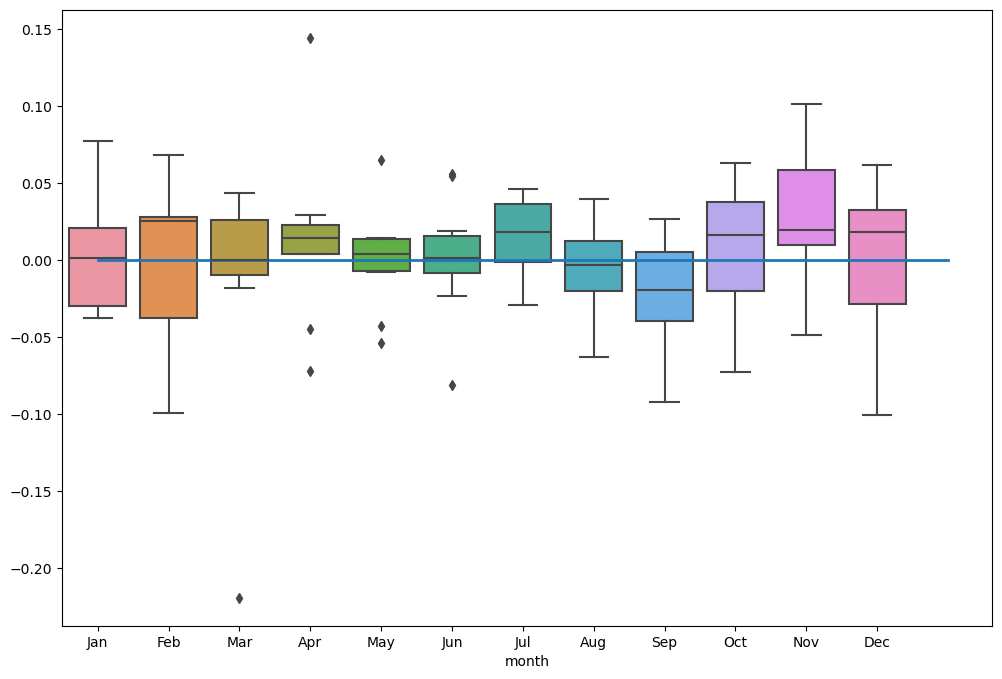

In [22]:
sns.boxplot(data=yrs_10_alt_log.transpose())
plt.plot([0,12],[0,0], linewidth=2)

##Phase 2: Stocks by Sector

Here we see the top 5 stocks for each of our 11 sectors. Our next idea is to see how stocks compare to each other within an industry. Do stocks from the same industry follow similar trends?
<br>
Sectors are listed in order of their weight in the S&P 500, and stocks are ranked as well within their industry, followed by their overall rank in the S&P 500 (at the time of creating this section).

(1) Information Technology


1.   MSFT - Microsoft Corporation - 1
2.   AAPL - Apple Inc - 2
3.   NVDA - Nvidia Corporation - 3
4.   AVGO - Broadcom Inc. - 10
5.   ORCL - Oracle - 21


(2) Health Care


1.   LLY - Eli and Lilly Company - 9
2.   UNH - UnitedHealth Group - 17
3.   JNJ - Johnson & Johnson - 19
4.   MRK - Merck & Co. Inc. - 23
5.   ABBV - AbbVie Inc. - 25
6.   TMO - Thermo Fisher Scientific Inc. - 32
<br>*MRK not found in dataset, replaced with TMO


(3) Financials


1. BRK.B - Berkshire Hathaway Inc - 8
2. JPM - JPMorgan Chase & Co - 11
3. V - Visa Inc. - 12
4. MA - Mastercard Incorporated - 16
5. BAC - Bank of America Corporation - 27
6. WFC - Wells Fargo & Co - 36
<br>*BRK.B csv file was empty, replaced with WFC



(4) Consumer Discretionary


1. AMZN - Amazon.com, Inc. - 6  
2. TSLA - Tesla, Inc - 13
3. HD - The Home Depot, Inc. - 20
4. MCD - Mcdonald's Corporation - 39
5. NKE - NIKE, Inc - 62



(5) Industrials


1. CAT - Caterpillar Inc. - 43
2. GE - GE Aerospace - 47
3. UNP - Union Pacific Corporation - 60
4. RTX - RTX Corp - 68
5. HON - Honeywell International Inc - 72




(6) Communication Services


1. GOOGL - Alphabet Inc. - 4
2. GOOG - Alphabet Inc. - 5
3. META - Meta Platforms, Inc. - 7
4. NFLX - Netflix, Inc. - 29
5. DIS - Walt Disney Company - 35
6. TMUS - T-Mobile US, Inc. - 42
<br>*GOOGL & GOOG part of same company, only using GOOGL for analysis



(7) Consumer Staples


1. WMT - Walmart Inc. - 14
2. PG - The Procter & Gamble Company - 18
3. COST - Costco Wholesale Corporation - 22
4. KO - The Coca-Cola Company - 30
5. PEP - PepsiCo, Inc - 31


(8) Energy


1.   XOM - Exxon Mobile Corporation - 15
2.   CVX - Chevron Corporation - 24
3.   COP - Conoco Phillips - 55
4.   EOG - EOG Resources, Inc. - 115
5.   SLB - Schlumberger Limited - 119



(9) Utilities


1. NEE - NextEra Energy, Inc. - 70
2. SO - The Southern Company - 121
3. DUK - Duke Energy Corporation - 125
4. CEG - Constellation Energy Corporation - 153
5. SRE - Sempra - 200
6. AEP - American Electric Power Company - 205
<br>*CEG had less than one year's data, replaced with AEP

(10) Materials


1. LIN - Linde plc - 34
2. SHW - The Sherwin-Williams Company - 113
3. FCX - Freeport-McMoRan Inc. - 128
4. ECL - Ecolab Inc. - 147
5. APD - Air products and Chemicals, Inc. - 166



(11) Real Estate


1. PLD - Prologis, Inc. - 84
2. AMT - American Tower Corporation - 109  
3. EQIX - Equinix, Inc. - 126
4. WELL - Welltower Inc. - 168
5. PSA - Public Storage - 183



###Sector Scatter Matrices
Here we see scatter matrices and correlations for the top 5 stocks within each sector. Almost all stocks show high levels of correlation with other stocks within their sector (0.8 correlation coefficient or higher). We also note with the heads of these data that in cleaning the data we only use dates for which all stocks in a particular sector have data in our larger data set.

              AMZN         HD        MCD        NKE      TLSA
Date                                                         
2010-06-29  5.4305  21.399557  46.801186  14.705998  1.592667
2010-06-30  5.4630  20.980974  46.385715  14.572248  1.588667
2010-07-01  5.5480  20.868866  46.977238  14.684420  1.464000
2010-07-02  5.4570  20.749268  46.575840  14.639119  1.280000
2010-07-06  5.5030  20.435339  46.554714  14.498897  1.074000
          AMZN        HD       MCD       NKE      TLSA
AMZN  1.000000  0.960065  0.937927  0.966468  0.821516
HD    0.960065  1.000000  0.975671  0.973523  0.851985
MCD   0.937927  0.975671  1.000000  0.933554  0.810292
NKE   0.966468  0.973523  0.933554  1.000000  0.853744
TLSA  0.821516  0.851985  0.810292  0.853744  1.000000


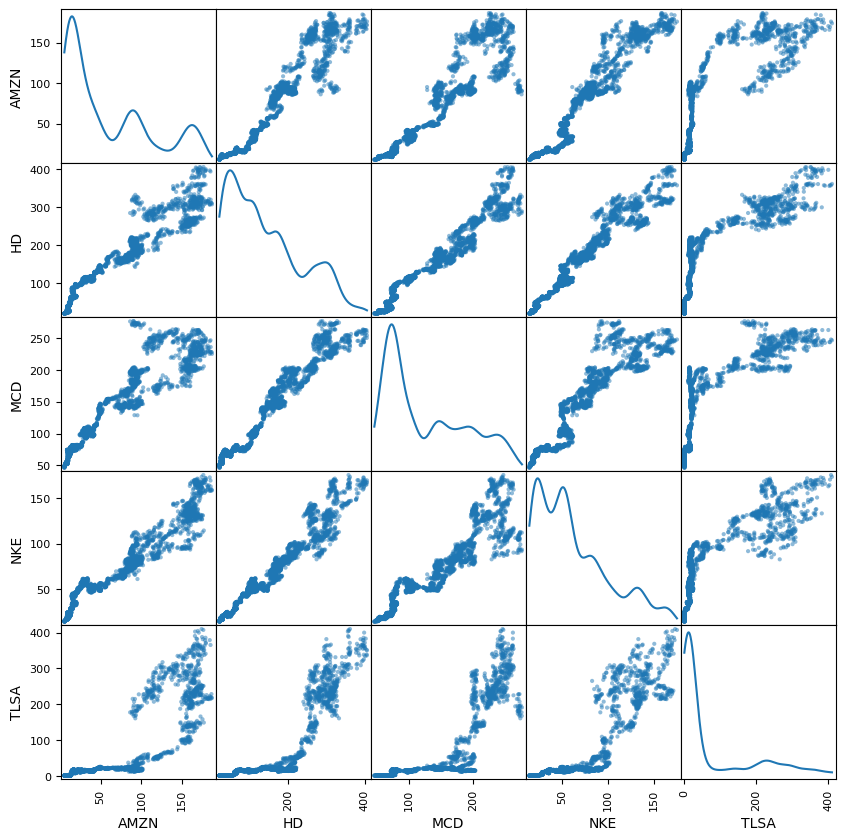

In [23]:
#Consumer Discretionary Sector Scatter Matrix
AMZN = d2['AMZN'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
HD = d2['HD'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
MCD = d2['MCD'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
NKE = d2['NKE'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
TSLA = d2['TSLA'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)

adjCD = pd.DataFrame({"AMZN": AMZN["Adj Close"],
                      "HD": HD["Adj Close"],
                      "MCD": MCD["Adj Close"],
                      "NKE": NKE["Adj Close"],
                      "TLSA": TSLA["Adj Close"]})
adjCD = adjCD.dropna()
print(adjCD.head())
#print(adjCD.tail())
print(adjCD.corr())
pd.plotting.scatter_matrix(adjCD, figsize=(10, 10), diagonal='kde')
plt.show()

                  DIS      GOOGL       META       NFLX       TMUS
Date                                                             
2012-05-18  39.225014  15.025025  38.230000   9.994286  10.588834
2012-05-21  39.744301  15.368118  34.029999  10.248571  10.621976
2012-05-22  39.744301  15.035035  31.000000   9.672857  10.638548
2012-05-23  39.583145  15.251752  32.000000  10.272857  10.655118
2012-05-24  39.789078  15.106607  33.029999  10.038571  10.671689
            DIS     GOOGL      META      NFLX      TMUS
DIS    1.000000  0.807041  0.917557  0.870671  0.806096
GOOGL  0.807041  1.000000  0.873231  0.835700  0.936018
META   0.917557  0.873231  1.000000  0.940595  0.851188
NFLX   0.870671  0.835700  0.940595  1.000000  0.833350
TMUS   0.806096  0.936018  0.851188  0.833350  1.000000


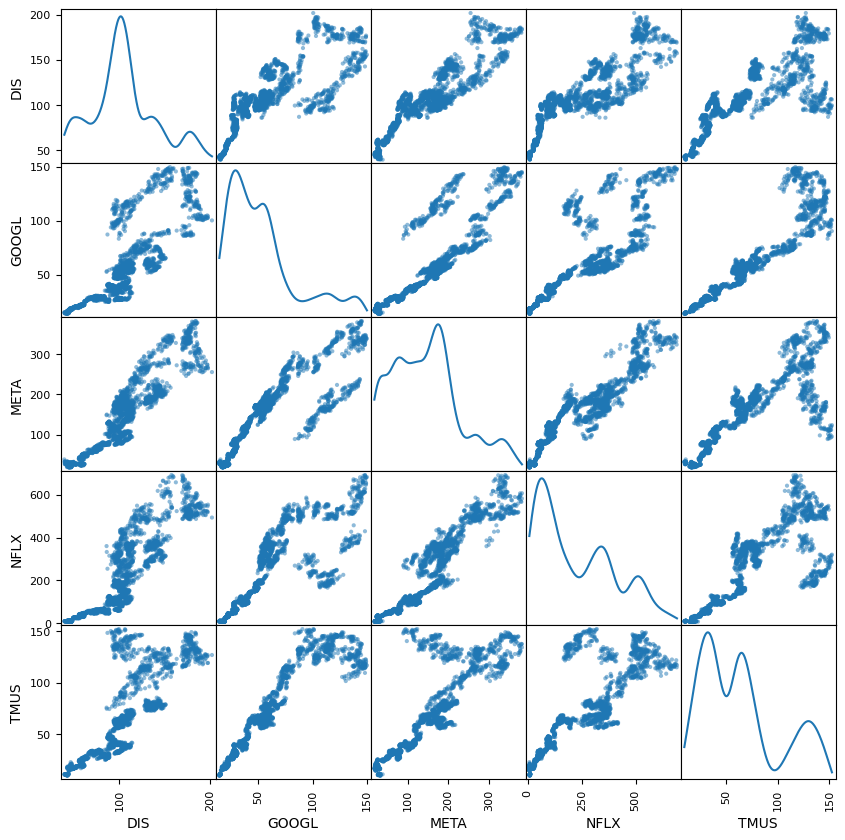

In [24]:
#Communication Services Sector Scatter Matrix
DIS = d2['DIS'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
GOOGL = d2['GOOGL'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
META = d2['META'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
NFLX = d2['NFLX'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
TMUS = d2['TMUS'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)

adjCM = pd.DataFrame({"DIS": DIS["Adj Close"],
                      "GOOGL": GOOGL["Adj Close"],
                      "META": META["Adj Close"],
                      "NFLX": NFLX["Adj Close"],
                      "TMUS": TMUS["Adj Close"]})
adjCM = adjCM.dropna()
print(adjCM.head())
#print(adjCM.tail())
print(adjCM.corr())
pd.plotting.scatter_matrix(adjCM, figsize=(10, 10), diagonal='kde')
plt.show()

                COST        KO       PEP        PG       WMT
Date                                                        
1986-07-09  7.656872  1.101127  2.237921  1.899446  1.872830
1986-07-10  7.613362  1.091177  2.229212  1.893238  1.863226
1986-07-11  7.352339  1.101127  2.229212  1.911860  1.863226
1986-07-14  7.134813  1.064644  2.142134  1.891194  1.771986
1986-07-15  6.917285  1.071277  2.089887  1.888064  1.704756
          COST        KO       PEP        PG       WMT
COST  1.000000  0.908001  0.951525  0.947081  0.936247
KO    0.908001  1.000000  0.976776  0.970765  0.956189
PEP   0.951525  0.976776  1.000000  0.990112  0.974155
PG    0.947081  0.970765  0.990112  1.000000  0.981767
WMT   0.936247  0.956189  0.974155  0.981767  1.000000


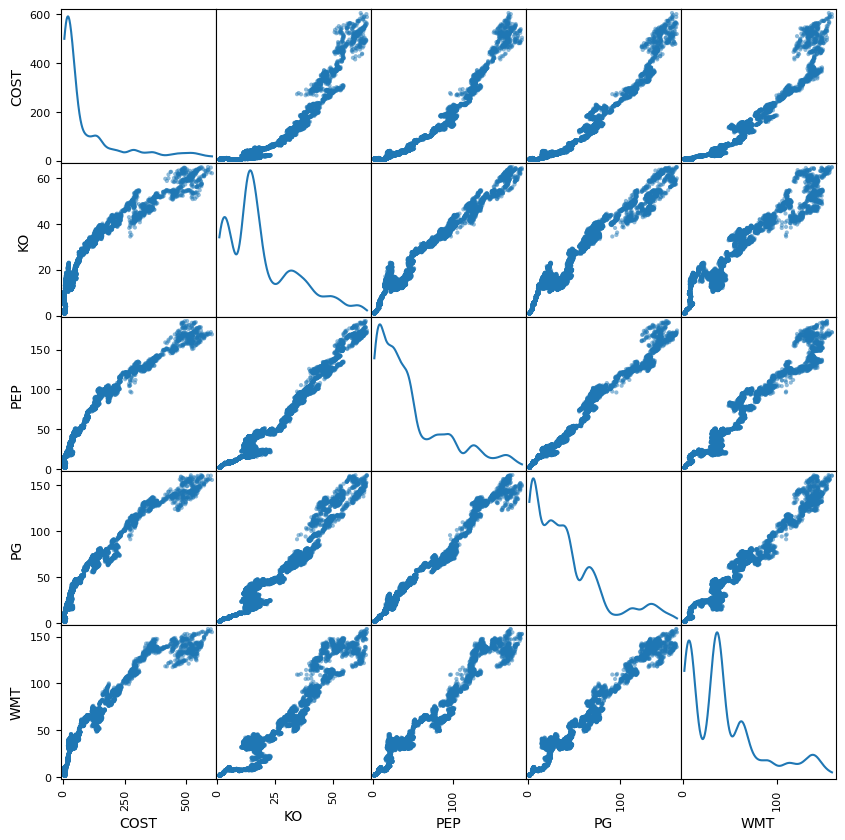

In [25]:
#Consumer Staples Sector Scatter Matrix
COST = d2['COST'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
KO = d2['KO'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
PEP = d2['PEP'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
PG = d2['PG'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
WMT = d2['WMT'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)

adjCN = pd.DataFrame({"COST": COST["Adj Close"],
                      "KO": KO["Adj Close"],
                      "PEP": PEP["Adj Close"],
                      "PG": PG["Adj Close"],
                      "WMT": WMT["Adj Close"]})
adjCN = adjCN.dropna()
print(adjCN.head())
#print(adjCN.tail())
print(adjCN.corr())
pd.plotting.scatter_matrix(adjCN, figsize=(10, 10), diagonal='kde')
plt.show()

                 COP       CVX       EOG       SLB       XOM
Date                                                        
1989-10-04  3.392624  4.576705  1.790514  5.315568  3.662815
1989-10-05  3.376623  4.713183  1.846467  5.330578  3.652613
1989-10-06  3.488643  4.804177  1.824086  5.375628  3.703626
1989-10-09  3.536652  4.731384  1.824086  5.465724  3.724031
1989-10-10  3.472638  4.785975  1.812896  5.450706  3.734235
          COP       CVX       EOG       SLB       XOM
COP  1.000000  0.970961  0.950405  0.696179  0.942696
CVX  0.970961  1.000000  0.963125  0.674613  0.945468
EOG  0.950405  0.963125  1.000000  0.747796  0.943262
SLB  0.696179  0.674613  0.747796  1.000000  0.846220
XOM  0.942696  0.945468  0.943262  0.846220  1.000000


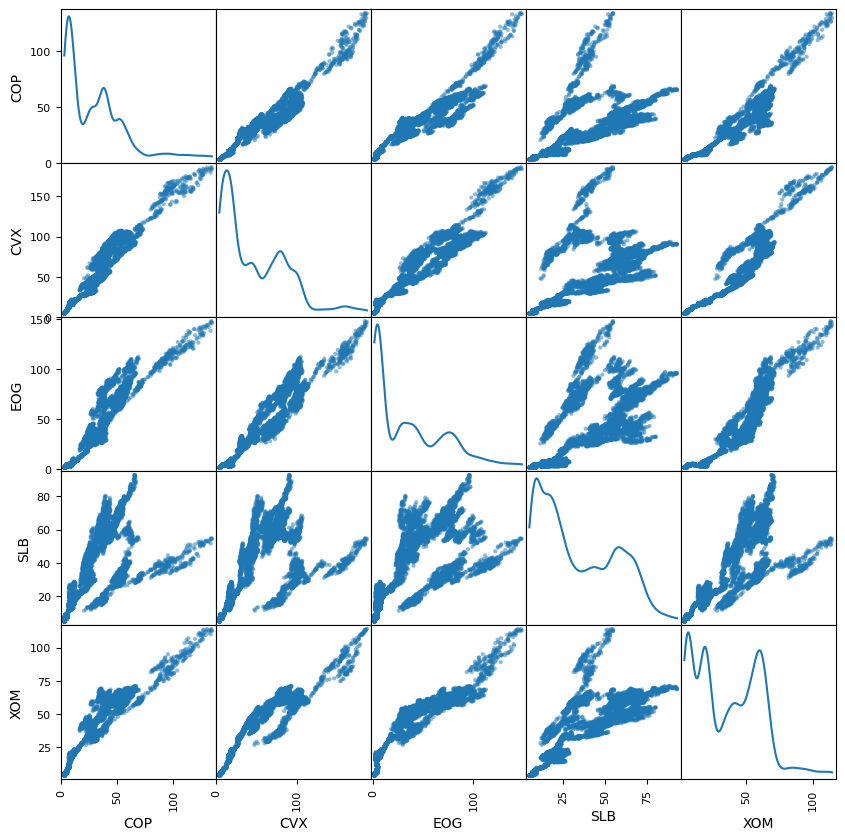

In [26]:
#Energy Sector Scatter Matrix
COP = d2['COP'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
CVX = d2['CVX'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
EOG = d2['EOG'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
SLB = d2['SLB'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
XOM = d2['XOM'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)

adjEN = pd.DataFrame({"COP": COP["Adj Close"],
                      "CVX": CVX["Adj Close"],
                      "EOG": EOG["Adj Close"],
                      "SLB": SLB["Adj Close"],
                      "XOM": XOM["Adj Close"]})
adjEN = adjEN.dropna()
print(adjEN.head())
#print(adjEN.tail())
print(adjEN.corr())
pd.plotting.scatter_matrix(adjEN, figsize=(10, 10), diagonal='kde')
plt.show()

                  BAC        JPM         MA          V        WFC
Date                                                             
2008-03-19  30.271275  29.137384  19.391973  12.752567  20.656967
2008-03-20  32.861927  31.538612  20.507717  14.524384  21.987715
2008-03-24  33.325100  31.936548  20.146656  13.481607  21.676987
2008-03-25  32.163219  31.600368  20.935774  14.276103  21.656719
2008-03-26  31.276146  30.262526  20.737564  14.436357  20.812338
          BAC       JPM        MA         V       WFC
BAC  1.000000  0.922554  0.869736  0.867271  0.607010
JPM  0.922554  1.000000  0.961052  0.968573  0.698527
MA   0.869736  0.961052  1.000000  0.995741  0.567950
V    0.867271  0.968573  0.995741  1.000000  0.616951
WFC  0.607010  0.698527  0.567950  0.616951  1.000000


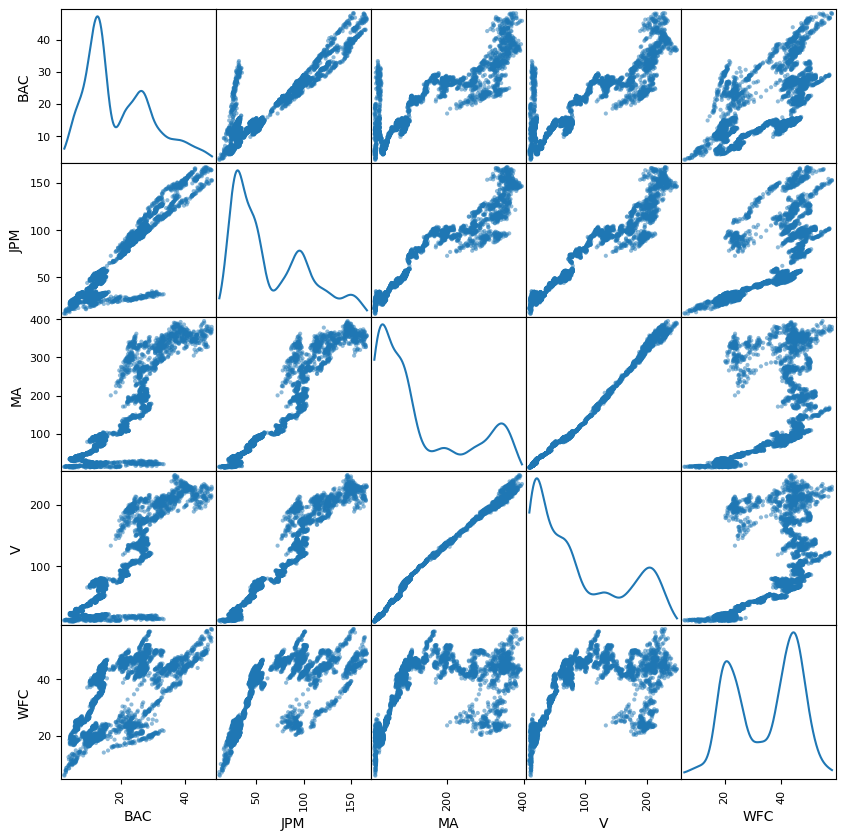

In [27]:
#Financials Sector Scatter Matrix
BAC = d2['BAC'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
JPM = d2['JPM'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
MA = d2['MA'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
V = d2['V'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
WFC = d2['WFC'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)

adjFI = pd.DataFrame({"BAC": BAC["Adj Close"],
                      "JPM": JPM["Adj Close"],
                      "MA": MA["Adj Close"],
                      "V": V["Adj Close"],
                      "WFC": WFC["Adj Close"]})
adjFI = adjFI.dropna()
print(adjFI.head())
#print(adjFI.tail())
print(adjFI.corr())
pd.plotting.scatter_matrix(adjFI, figsize=(10, 10), diagonal='kde')
plt.show()

                 ABBV        JNJ        LLY        TMO        UNH
Date                                                             
2013-01-02  23.325552  53.958759  38.804733  62.729500  46.767387
2013-01-03  23.132946  53.882584  38.969326  62.536503  44.580799
2013-01-04  22.840710  54.499561  40.411484  63.086559  44.666538
2013-01-07  22.887201  54.385300  40.356613  63.578758  44.666538
2013-01-08  22.389074  54.392914  40.662281  63.183094  44.074867
          ABBV       JNJ       LLY       TMO       UNH
ABBV  1.000000  0.940328  0.944345  0.925012  0.976326
JNJ   0.940328  1.000000  0.898776  0.942149  0.967276
LLY   0.944345  0.898776  1.000000  0.938968  0.959250
TMO   0.925012  0.942149  0.938968  1.000000  0.965550
UNH   0.976326  0.967276  0.959250  0.965550  1.000000


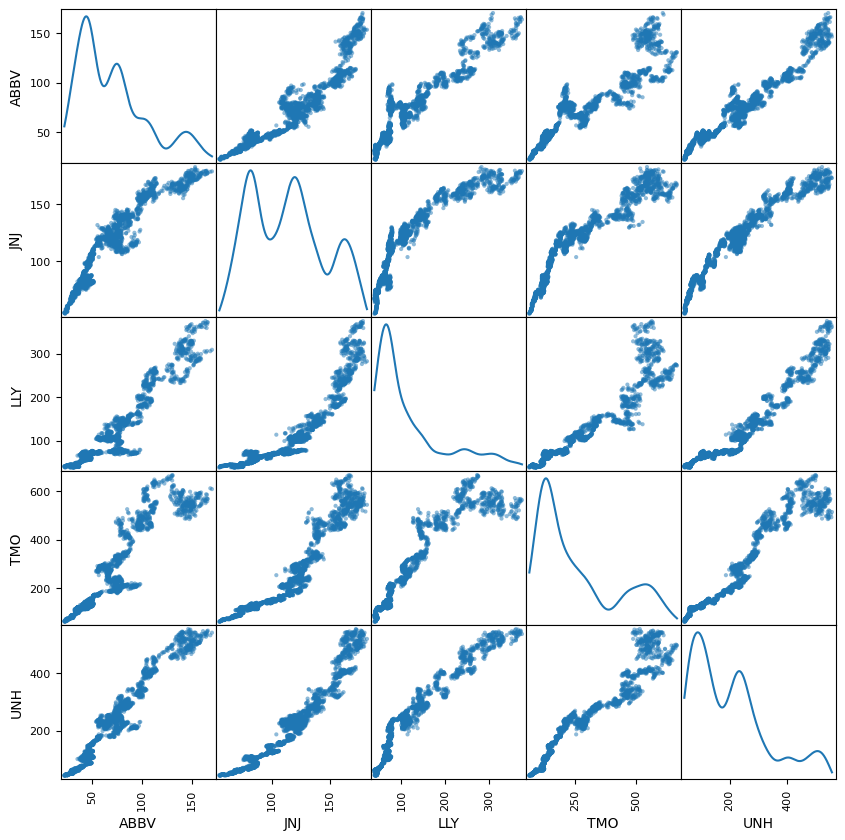

In [28]:
#Health Care Sector Scatter Matrix
ABBV = d2['ABBV'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
JNJ = d2['JNJ'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
LLY = d2['LLY'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
TMO = d2['TMO'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
UNH = d2['UNH'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)

adjHC = pd.DataFrame({"ABBV": ABBV["Adj Close"],
                      "JNJ": JNJ["Adj Close"],
                      "LLY": LLY["Adj Close"],
                      "TMO": TMO["Adj Close"],
                      "UNH": UNH["Adj Close"]})
adjHC = adjHC.dropna()
print(adjHC.head())
#print(adjHC.tail())
print(adjHC.corr())
pd.plotting.scatter_matrix(adjHC, figsize=(10, 10), diagonal='kde')
plt.show()

                 CAT        GE       HON       RTX       UNP
Date                                                        
1980-01-02  2.494279  2.302336  2.231277  0.543614  1.078457
1980-01-03  2.470858  2.331852  2.184303  0.548438  1.063426
1980-01-04  2.505991  2.408597  2.207789  0.596688  1.082214
1980-01-07  2.494279  2.491246  2.201918  0.627246  1.076577
1980-01-08  2.517698  2.579797  2.254764  0.635288  1.037122
          CAT        GE       HON       RTX       UNP
CAT  1.000000  0.326810  0.968985  0.946175  0.967755
GE   0.326810  1.000000  0.333129  0.487835  0.233292
HON  0.968985  0.333129  1.000000  0.939993  0.984647
RTX  0.946175  0.487835  0.939993  1.000000  0.925120
UNP  0.967755  0.233292  0.984647  0.925120  1.000000


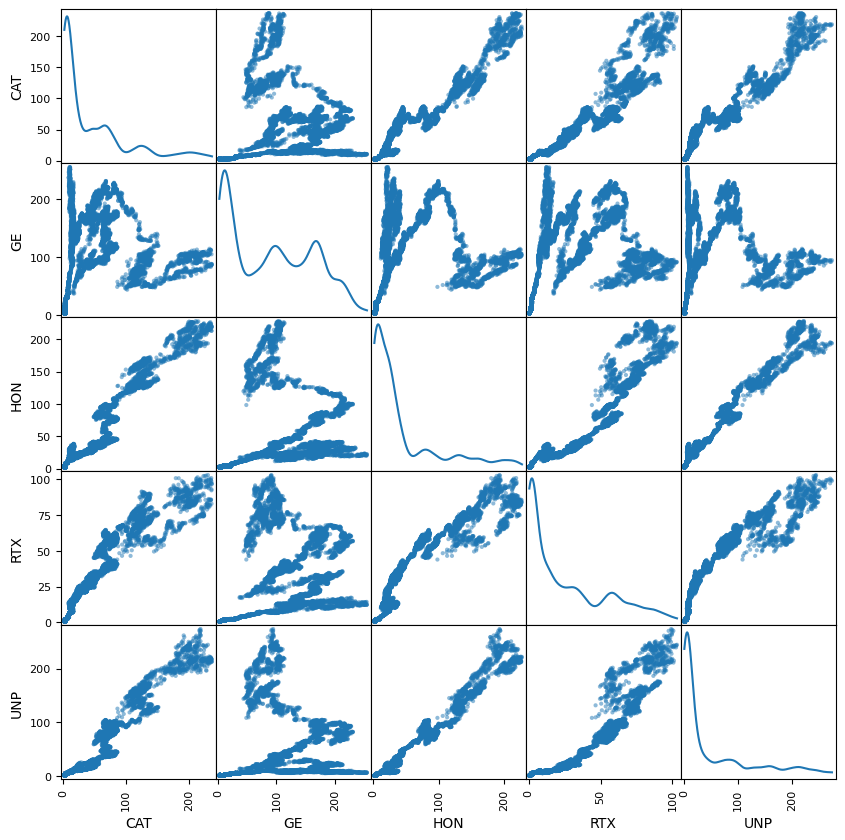

In [29]:
#Industrials Sector Scatter Matrix
CAT = d2['CAT'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
GE = d2['GE'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
HON = d2['HON'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
RTX = d2['RTX'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
UNP = d2['UNP'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)

adjIN = pd.DataFrame({"CAT": CAT["Adj Close"],
                      "GE": GE["Adj Close"],
                      "HON": HON["Adj Close"],
                      "RTX": RTX["Adj Close"],
                      "UNP": UNP["Adj Close"]})
adjIN = adjIN.dropna()
print(adjIN.head())
#print(adjIN.tail())
print(adjIN.corr())
pd.plotting.scatter_matrix(adjIN, figsize=(10, 10), diagonal='kde')
plt.show()

                AAPL       AVGO       MSFT      NVDA       ORCL
Date                                                           
2009-08-06  4.989995  12.020389  17.772758  3.010227  17.735376
2009-08-07  5.038702  12.206119  17.848522  3.145597  17.919340
2009-08-10  5.014652  11.864376  17.742455  3.042348  17.768820
2009-08-11  4.957115  11.641502  17.522755  2.971222  17.793907
2009-08-12  5.032614  11.886665  17.825783  3.081354  18.295616
          AAPL      AVGO      MSFT      NVDA      ORCL
AAPL  1.000000  0.970081  0.985469  0.962903  0.946753
AVGO  0.970081  1.000000  0.974841  0.942476  0.966641
MSFT  0.985469  0.974841  1.000000  0.965213  0.960312
NVDA  0.962903  0.942476  0.965213  1.000000  0.932807
ORCL  0.946753  0.966641  0.960312  0.932807  1.000000


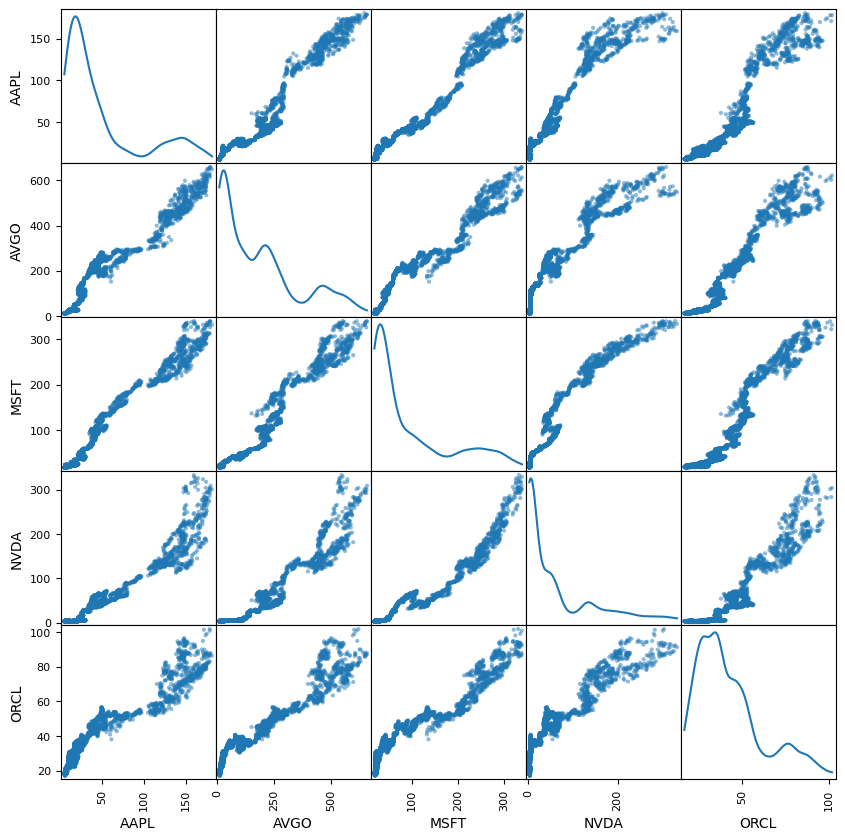

In [30]:
#Information Technology Sector Scatter Matrix
AAPL = d2['AAPL'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
AVGO = d2['AVGO'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
MSFT = d2['MSFT'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
NVDA = d2['NVDA'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
ORCL = d2['ORCL'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)

adjIT = pd.DataFrame({"AAPL": AAPL["Adj Close"],
                      "AVGO": AVGO["Adj Close"],
                      "MSFT": MSFT["Adj Close"],
                      "NVDA": NVDA["Adj Close"],
                      "ORCL": ORCL["Adj Close"]})
adjIT = adjIT.dropna()
print(adjIT.head())
#print(adjIT.tail())
print(adjIT.corr())
pd.plotting.scatter_matrix(adjIT, figsize=(10, 10), diagonal='kde')
plt.show()

                  APD       ECL       FCX       LIN       SHW
Date                                                         
1995-07-10  14.860429  4.530764  6.851299  8.602671  3.889317
1995-07-11  14.390163  4.530764  6.991118  8.137660  3.875859
1995-07-12  14.609614  4.575624  7.305720  8.413758  3.875859
1995-07-13  14.515570  4.575624  7.305720  8.525168  3.862402
1995-07-14  14.264747  4.642910  7.270765  8.641420  3.929690
          APD       ECL       FCX       LIN       SHW
APD  1.000000  0.972310  0.387580  0.977030  0.982134
ECL  0.972310  1.000000  0.345834  0.942890  0.954953
FCX  0.387580  0.345834  1.000000  0.512504  0.349157
LIN  0.977030  0.942890  0.512504  1.000000  0.975031
SHW  0.982134  0.954953  0.349157  0.975031  1.000000


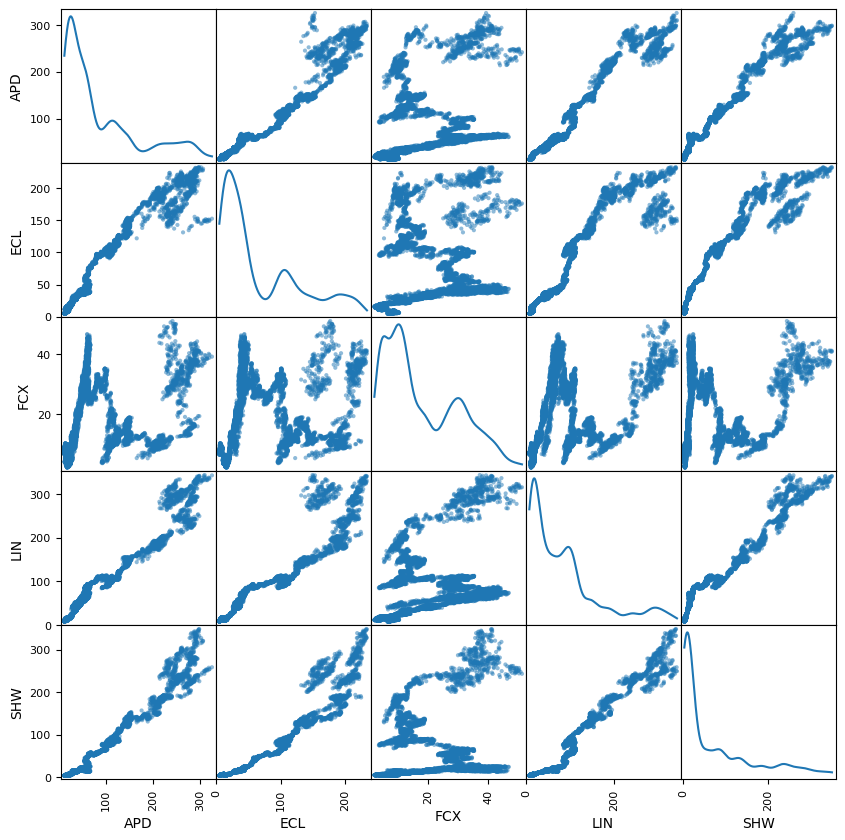

In [31]:
#Materials Sector Scatter Matrix
APD = d2['APD'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
ECL = d2['ECL'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
FCX = d2['FCX'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
LIN = d2['LIN'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
SHW = d2['SHW'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)

adjMA = pd.DataFrame({"APD": APD["Adj Close"],
                      "ECL": ECL["Adj Close"],
                      "FCX": FCX["Adj Close"],
                      "LIN": LIN["Adj Close"],
                      "SHW": SHW["Adj Close"]})
adjMA = adjMA.dropna()
print(adjMA.head())
#print(adjMA.tail())
print(adjMA.corr())
pd.plotting.scatter_matrix(adjMA, figsize=(10, 10), diagonal='kde')
plt.show()

                  AMT        EQIX        PLD        PSA      WELL
Date                                                             
2000-08-11  34.133457  332.254517  10.342894  10.819366  5.031508
2000-08-14  34.846687  303.775543  10.396482  10.792511  5.064937
2000-08-15  35.050468  306.939728  10.396482  10.711974  4.964642
2000-08-16  35.254253  313.268524  10.450072  10.765668  4.964642
2000-08-17  34.693836  303.775543  10.423276  10.819366  4.981358
           AMT      EQIX       PLD       PSA      WELL
AMT   1.000000  0.982165  0.947945  0.931328  0.908849
EQIX  0.982165  1.000000  0.936146  0.916470  0.875119
PLD   0.947945  0.936146  1.000000  0.907271  0.846369
PSA   0.931328  0.916470  0.907271  1.000000  0.964304
WELL  0.908849  0.875119  0.846369  0.964304  1.000000


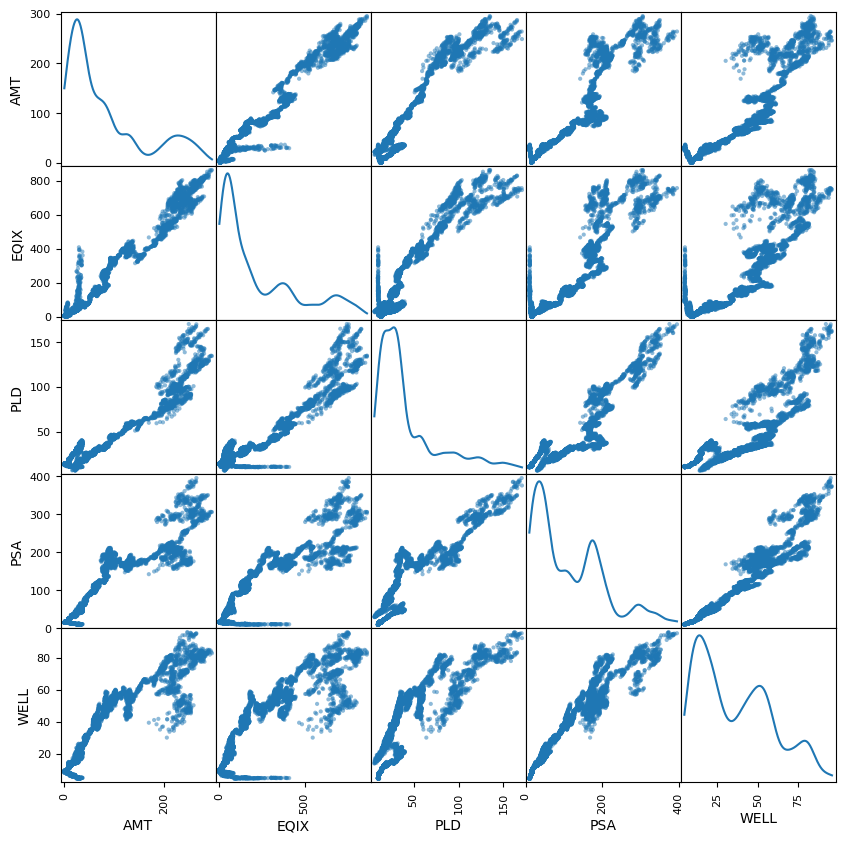

In [32]:
#Real Estate Sector Scatter Matrix
AMT = d2['AMT'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
EQIX = d2['EQIX'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
PLD = d2['PLD'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
PSA = d2['PSA'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
WELL = d2['WELL'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)

adjRE = pd.DataFrame({"AMT": AMT["Adj Close"],
                      "EQIX": EQIX["Adj Close"],
                      "PLD": PLD["Adj Close"],
                      "PSA": PSA["Adj Close"],
                      "WELL": WELL["Adj Close"]})
adjRE = adjRE.dropna()
print(adjRE.head())
#print(adjRE.tail())
print(adjRE.corr())
pd.plotting.scatter_matrix(adjRE, figsize=(10, 10), diagonal='kde')
plt.show()

                  DUK       NEE        SO        SRE        AEP
Date                                                           
1998-06-29  16.994530  3.555818  5.360571  11.760394  15.303931
1998-06-30  16.887655  3.559347  5.372697  11.451584  15.137129
1998-07-01  16.941099  3.580536  5.360571  11.477323  15.283077
1998-07-02  16.923286  3.569942  5.348442  11.400123  15.366477
1998-07-06  16.869835  3.591128  5.324185  11.194250  15.491585
          DUK       NEE        SO       SRE       AEP
DUK  1.000000  0.947832  0.977049  0.982795  0.984243
NEE  0.947832  1.000000  0.951624  0.932231  0.962009
SO   0.977049  0.951624  1.000000  0.979462  0.970097
SRE  0.982795  0.932231  0.979462  1.000000  0.981951
AEP  0.984243  0.962009  0.970097  0.981951  1.000000


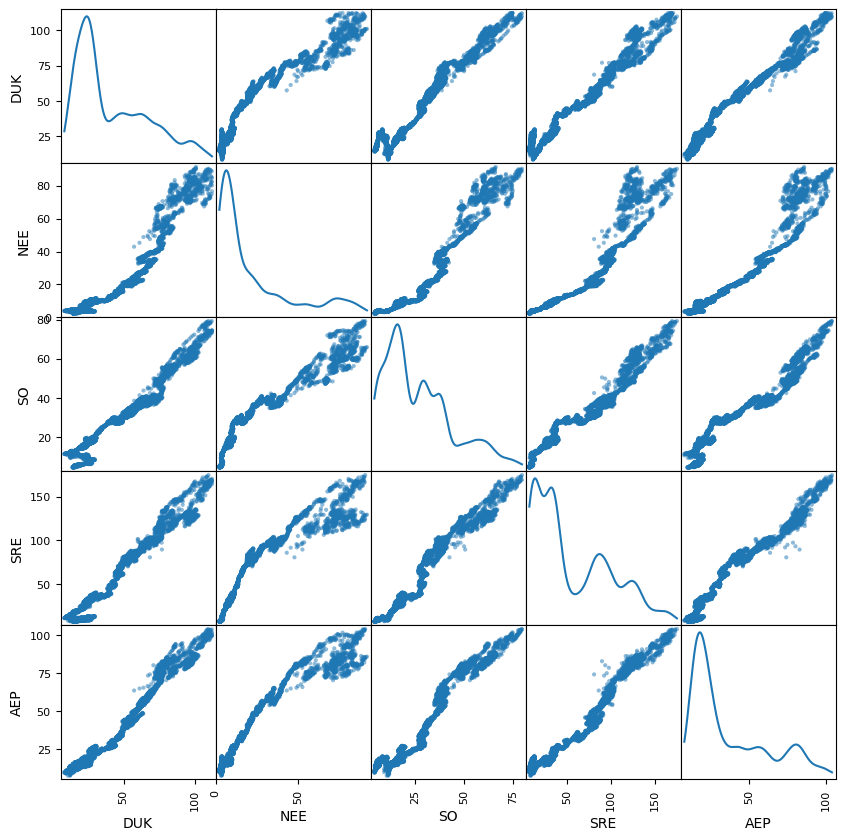

In [33]:
#Utilities Sector Scatter Matrix
DUK = d2['DUK'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
NEE = d2['NEE'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
SO = d2['SO'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
SRE = d2['SRE'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
AEP = d2['AEP'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)

adjUT = pd.DataFrame({
                      "DUK": DUK["Adj Close"],
                      "NEE": NEE["Adj Close"],
                      "SO": SO["Adj Close"],
                      "SRE": SRE["Adj Close"],
                      "AEP": AEP["Adj Close"]})
adjUT = adjUT.dropna()
print(adjUT.head())
#print(adjUT.tail())
print(adjUT.corr())
pd.plotting.scatter_matrix(adjUT, figsize=(10, 10), diagonal='kde')
plt.show()

###Other Sector Data

Low Correlation Stocks:

* Schlumberger Limited | Energy | SLB--(.67,.85)
* Wells Fargo & Co | Financials | WFC--(.56,.70)
* Freeport-McMoRan Inc. | Materials | FCX--(.34,.52)
* GE Aerospace | Industrials | GE--(.23,.49)

These four stocks were the only stocks that showed correlation within their industries below 0.8. Their ranges of correlation within their industries are above. We decided to look and see if any of these stocks were well correlated with each other, which might suggest the need for a new industry classification. Unfortunately, these stocks show even worse correlation with each other, suggesting they may just be outliers.



                 SLB       WFC       FCX         GE
Date                                               
1995-07-10  8.449503  3.540421  6.851299  38.964882
1995-07-11  8.500204  3.510415  6.991118  38.475773
1995-07-12  8.517098  3.510415  7.305720  38.557289
1995-07-13  8.550900  3.540421  7.305720  38.149685
1995-07-14  8.652294  3.480412  7.270765  37.905148
          SLB       WFC       FCX        GE
SLB  1.000000  0.624376  0.638005  0.369320
WFC  0.624376  1.000000  0.380633  0.115208
FCX  0.638005  0.380633  1.000000 -0.097414
GE   0.369320  0.115208 -0.097414  1.000000


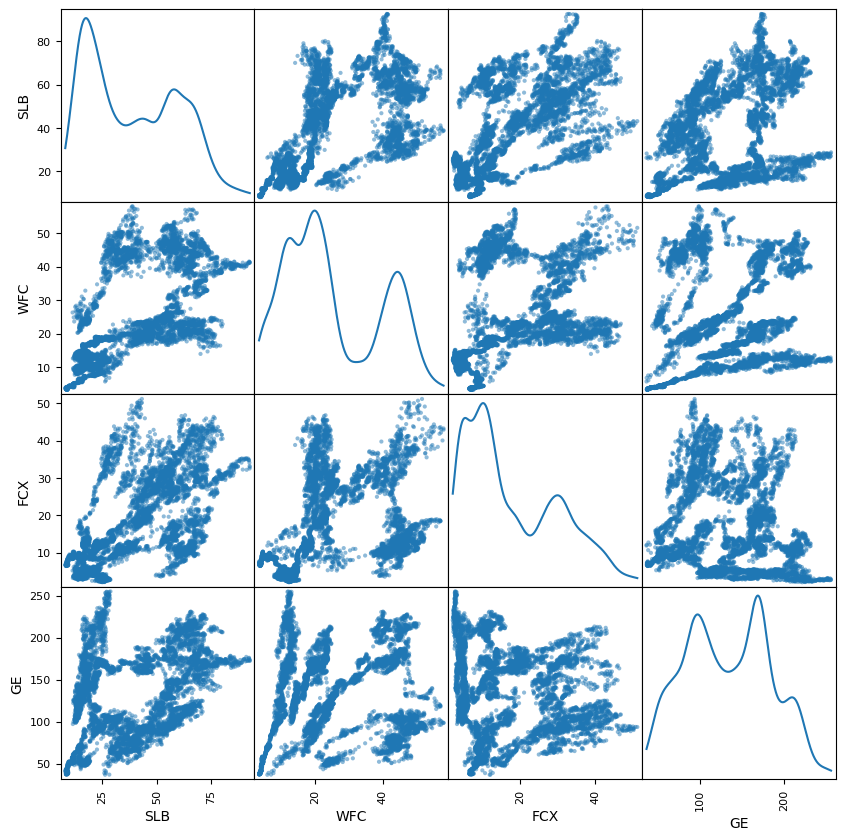

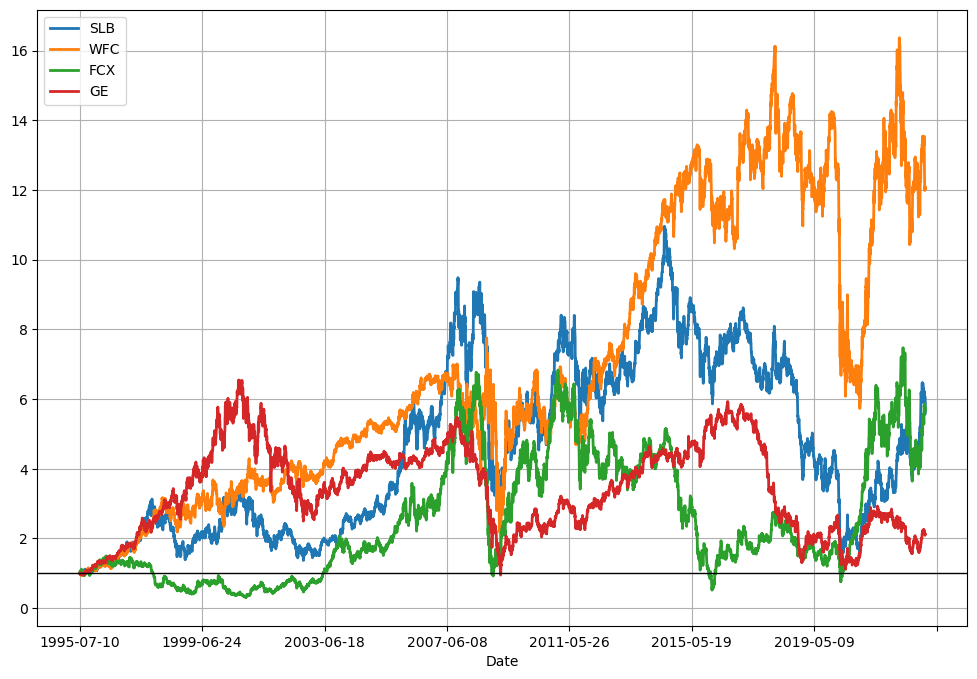

In [34]:
#Low Correlation Stocks Scatter Matrix
GE = d2['GE'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
SLB = d2['SLB'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
WFC = d2['WFC'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)
FCX = d2['FCX'].set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)

adjWeird = pd.DataFrame({"SLB": SLB["Adj Close"],
                      "WFC": WFC["Adj Close"],
                      "FCX": FCX["Adj Close"],
                      "GE": GE["Adj Close"]})
adjWeird = adjWeird.dropna()
print(adjWeird.head())
#print(adjWeird.tail())
print(adjWeird.corr())
pd.plotting.scatter_matrix(adjWeird, figsize=(10, 10), diagonal='kde')
plt.show()
Weird_return = adjWeird.apply(lambda x: x / x.iloc[0])
Weird_return.head()
Weird_return.plot(grid = True,lw=2).axhline(y = 1, color = "black", lw = 1);

This final piece of this section compares the top stocks of each sector. We see a massive difference between the growth of Amazon & Google compared to the other sector top stocks. This could be further explored to show growth comparisons by sector, likely seeing Amazon & Google's sectors experience much larger growth than other sectors in the digital age. All the other top stocks show comparable growth to each other.

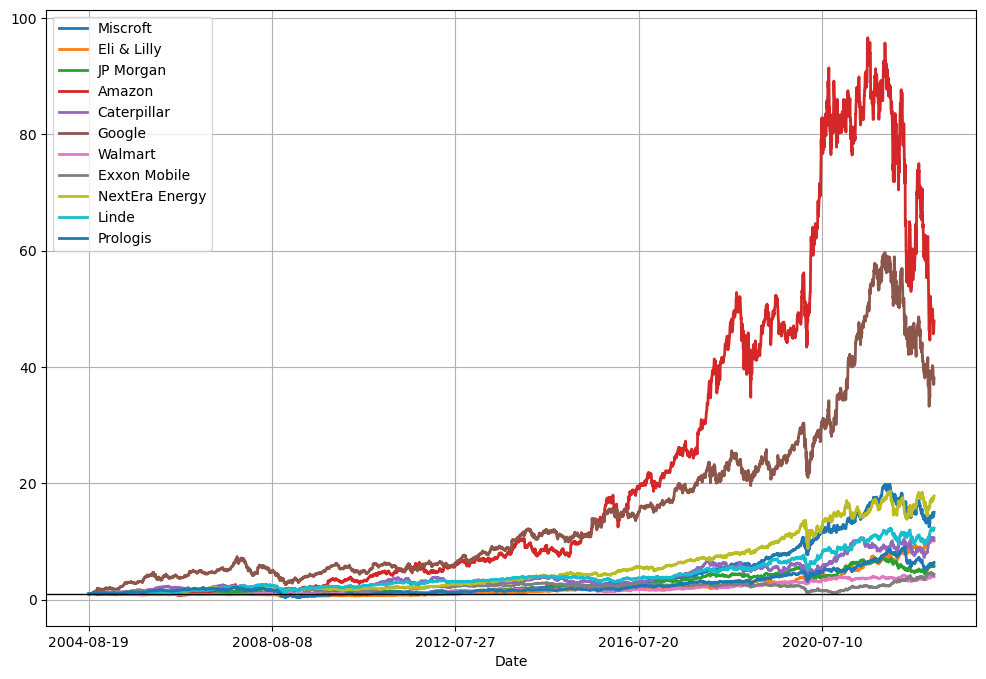

In [35]:
#Top Stocks for Each Industry Comparison
adjTop = pd.DataFrame({"Miscroft": MSFT["Adj Close"],
                          "Eli & Lilly": LLY["Adj Close"],
                          "JP Morgan": JPM["Adj Close"],
                          "Amazon": AMZN["Adj Close"],
                          "Caterpillar": CAT["Adj Close"],
                          "Google": GOOGL["Adj Close"],
                          "Walmart": WMT["Adj Close"],
                          "Exxon Mobile": XOM["Adj Close"],
                          "NextEra Energy": NEE["Adj Close"],
                          "Linde": LIN["Adj Close"],
                          "Prologis": PLD["Adj Close"]})

adjTop = adjTop.dropna()
Top_return = adjTop.apply(lambda x: x / x.iloc[0])
Top_return.head()
Top_return.plot(grid = True,lw=2).axhline(y = 1, color = "black", lw = 1);
#print(adjTop.corr())
#pd.plotting.scatter_matrix(adjTop, figsize=(10, 10), diagonal='kde')
#plt.show()

##Phase 3: Daily Trends

First in this section we graph Apple close over open prices for each day. We see a no clear trend of closing prices above opening prices, which is not fully expected for a stock that is consistently increasing. This suggests the days Apple increased it is likely increasing more than it is decreasing on the days that it's decreasing.

<Axes: >

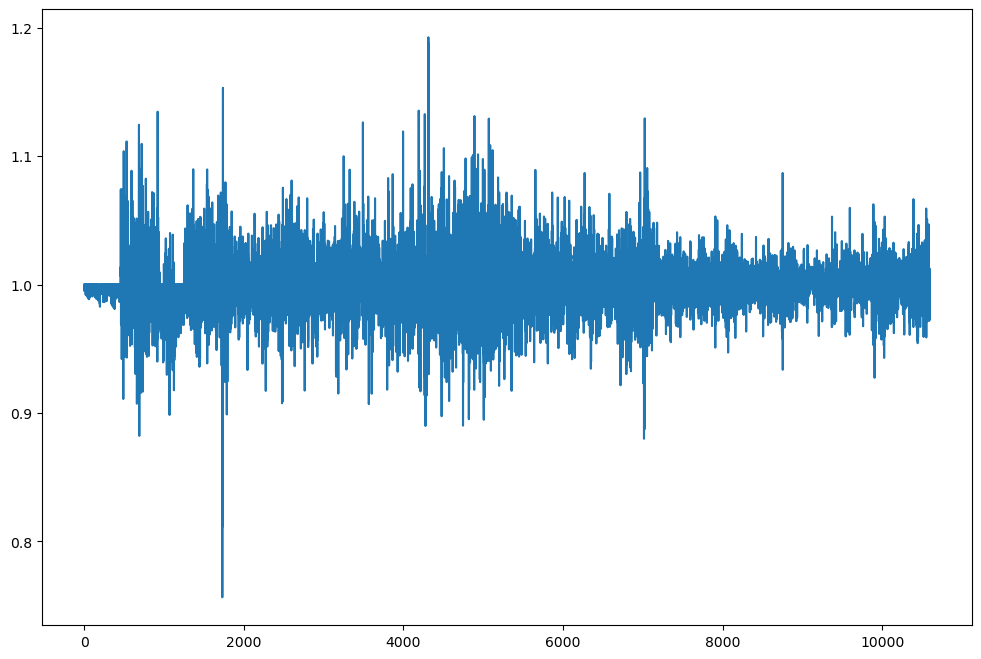

In [36]:
#d2['AAPL']["Adj Close"].plot(grid = True,lw=2);
x = [1]
#print(d2['AAPL'].loc[0,'Adj Close'])
for i in range(len(d2['AAPL'])):
  if i>0:
    x.append(d2['AAPL'].loc[i,'Close'] / d2['AAPL'].loc[i, 'Open'])
x = pd.Series(x)
x.plot()

This is comparing the difference from high to close and close to low for Apple. We see very slightly that more days Apple stock close was closer to low than it was to high, which is unexpected for a stock that is increasing consistently.

5352 5239


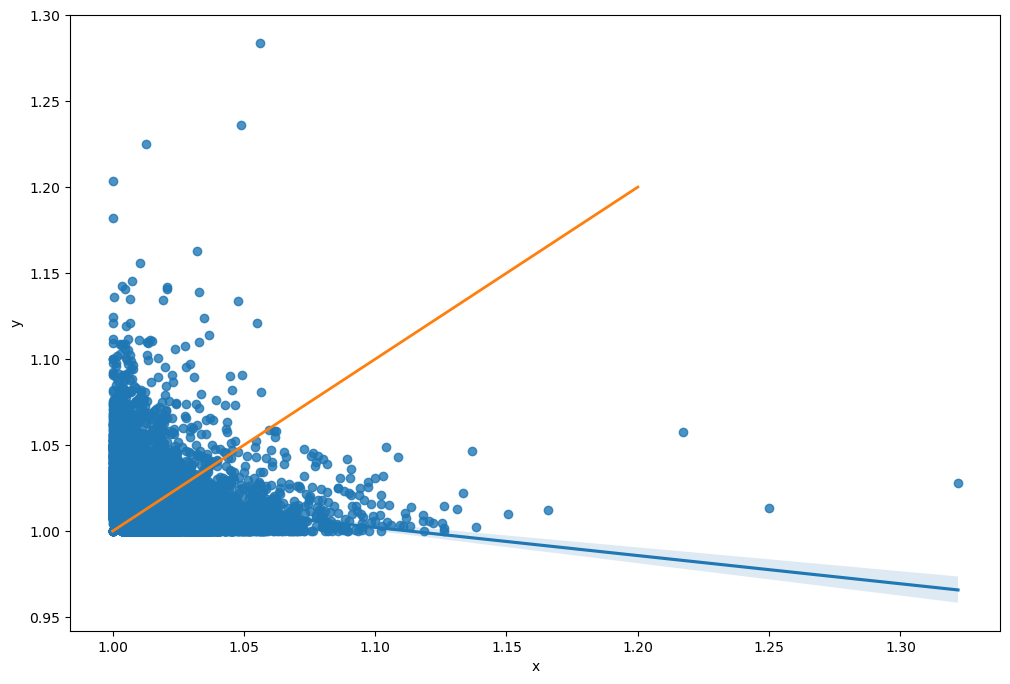

In [37]:
x = []
y = []
xC=0
yC=0

for i in range(len(d2['AAPL'])):
  x.append(d2['AAPL'].loc[i,'High'] / d2['AAPL'].loc[i, 'Close'])
  y.append(d2['AAPL'].loc[i,'Close'] / d2['AAPL'].loc[i, 'Low'])
  if x[i]>y[i]:
    xC = xC+1
  else:
    yC = yC+1

df = pd.DataFrame({"x" : x,"y" : y})
#df.plot(kind='scatter', x='x', y='y', color='r')
sns.regplot(data=df,x='x',y='y')
plt.plot([1, 1.2], [1, 1.2], linewidth=2)

print(xC,yC)

The following code counts for every single day for each stock whether the high price divided by close price is larger than the close price divided by low price for that day. It shows that close is closer to high more often than it is to low, with 1915191 data points where close is closer to low, and 2205479 data points where close is closer to high, approximately a 15% difference.

In [ ]:
#This will take a long time to run, took about 4 minutes for us
hC=0
lC=0

for x in d2:
  for i in range(len(d2[x])):
    if (d2[x].loc[i,'High'] / d2[x].loc[i, 'Close']) > (d2[x].loc[i,'Close'] / d2[x].loc[i, 'Low']):
      lC = lC+1
    else:
      hC = hC+1
print("High | Low")
print(hC,lC)
print(hC/lC)

ax1=d2['GE'].plot(kind='scatter', x='Date', y='Adj Close', color='r', label='Aapl')
ax2=d2['AAPL'].plot(kind='scatter', x='Date', y='Adj Close', color='g', label='Goog', ax=ax1)

ax1.set_xlabel('Date')

print(ax1)


###Volume
This shows relationships with day to day data. The top graph for the three companies chosen is comparing the high vs open, high vs close, and open vs close prices on the y axis and volume of shares moved on the x axis. For example Appple around 8 million shares are moved on most days, with exon moving close to 2 million and JNJ moving 600 thousand. There is not a strong correlation between the volume of stock moved in a day and changes in stock price for the day.

The second set of graphs is comparing the high vs open, high vs low and open vs close and if they are correlated. The High vs low and open vs close are more highly correlated with high vs low and high vs open being next highest correlated and high vs open and open vs close having the lowest correlation.

In [ ]:
appl = pd.DataFrame(d2['AAPL'])
appl['high_open']= abs(appl['High']-appl['Open'])
appl['high_low']= abs(appl['High']-appl['Low'])
appl['open_close']= abs(appl['Open']-appl['Close'])
appl['year'] = appl['Date'].str[:4]
appl2021 = appl[appl['year'] == '2021']
ap2=appl2021.plot(kind='scatter', x='Volume', y='high_open', color='g', label='high_open')
ap3=appl2021.plot(kind='scatter', x='Volume', y='high_low', color='b', label='high_close',ax=ap2)
ap4=appl2021.plot(kind='scatter', x='Volume', y='open_close', color='r', label='open_close',ax=ap2)
plt.ylabel('Price change')


In [ ]:
applRE = pd.DataFrame({"high_open": appl2021["high_open"],
                      "high_low": appl2021["high_low"],
                      "open_close": appl2021["open_close"]})
pd.plotting.scatter_matrix(applRE, figsize=(10, 10), diagonal='kde')
print(applRE.corr())

In [ ]:
jnj = pd.DataFrame(d2['JNJ'])
jnj['high_open']= abs(jnj['High']-jnj['Open'])
jnj['high_low']= abs(jnj['High']-jnj['Low'])
jnj['open_close']= abs(jnj['Open']-jnj['Close'])
jnj['year'] = jnj['Date'].str[:4]
jnj2021 = jnj[jnj['year'] == '2021']
jn2=jnj2021.plot(kind='scatter', x='Volume', y='high_open', color='g', label='high_open')
jn3=jnj2021.plot(kind='scatter', x='Volume', y='high_low', color='b', label='high_low',ax=jn2)
jn4=jnj2021.plot(kind='scatter', x='Volume', y='open_close', color='r', label='open_close',ax=jn2)
plt.ylabel('Price change')


In [ ]:
jnjRE = pd.DataFrame({"high_open": jnj2021["high_open"],
                      "high_low": jnj2021["high_low"],
                      "open_close": jnj2021["open_close"]})
pd.plotting.scatter_matrix(jnjRE, figsize=(10, 10), diagonal='kde')
print(jnjRE.corr())

In [ ]:
xom = pd.DataFrame(d2['XOM'])
xom['high_open']= abs(xom['High']-xom['Open'])
xom['high_low']= abs(xom['High']-xom['Low'])
xom['open_close']= abs(xom['Open']-xom['Close'])
xom['year'] = xom['Date'].str[:4]
xom2021 = xom[xom['year'] == '2021']
xo2=xom2021.plot(kind='scatter', x='Volume', y='high_open', color='g', label='high_open')
xo3=xom2021.plot(kind='scatter', x='Volume', y='high_low', color='b', label='high_low',ax=xo2)
xo4=xom2021.plot(kind='scatter', x='Volume', y='open_close', color='r', label='open_close',ax=xo2)
plt.ylabel('Price change')


In [ ]:
xomRE = pd.DataFrame({"high_open": xom2021["high_open"],
                      "high_low": xom2021["high_low"],
                      "open_close": xom2021["open_close"]})
pd.plotting.scatter_matrix(xomRE, figsize=(10, 10), diagonal='kde')
print(xomRE.corr())